Скачиваем **pandas**

In [3]:
!pip install pandas

Устанавливаем **plotly** для графиков

In [4]:
!pip install plotly

Импортируем модуль **pandas**

In [5]:
import plotly.express as px

Импортируем модуль **plotly**

In [6]:
import plotly.express as px

Создаём dataframe из файла *steam_games*

In [7]:
df_steam_games = pd.read_csv("steam_games.csv")
print(df_steam_games)

       steam_appid                  name               developers  \
0          2719580              勇者の伝説の勇者                 ['ぽけそう']   
1          2719590         Light No Fire          ['Hello Games']   
2          2719600  Lorhaven: Cursed War      ['GoldenGod Games']   
3          2719610          PUIQ: Demons              ['Giammnn']   
4          2719650        Project XSTING          ['Saucy Melon']   
...            ...                   ...                      ...   
71424      2294300     Touchdown Pinball  ['Super PowerUp Games']   
71425      2294250     Speed Golf Royale      ['Mainframe Games']   
71426      2294160         Isle of Swaps           ['Fuzz Force']   
71427      2294130               Goobies               ['Knifes']   
71428      2294630       WindowBlinds 11             ['Stardock']   

                    publishers  \
0                     ['ぽけそう']   
1              ['Hello Games']   
2          ['GoldenGod Games']   
3                  ['Giammnn']   
4

Создаём dataframe из файла *Valve_Player_Data*

In [9]:
df_valve_player_data = pd.read_csv("Valve_Player_Data.csv")
print(df_valve_player_data)

          Month_Year  Avg_players       Gain Percent_Gain  Peak_Players  \
0     September 2021    512350.92     268.96       +0.05%        942519   
1        August 2021    512081.96    6014.60       +1.19%        802544   
2          July 2021    506067.36  -43279.72       -7.88%        763523   
3          June 2021    549347.08 -110541.81      -16.75%        929940   
4           May 2021    659888.89  -63457.63       -8.77%       1087197   
...              ...          ...        ...          ...           ...   
5266   December 2016       192.03     -21.90      -10.24%           405   
5267   November 2016       213.92    -134.68      -38.63%           537   
5268    October 2016       348.60    -201.75      -36.66%          1031   
5269  September 2016       550.36     543.26    +7654.89%          2836   
5270     August 2016         7.10        NaN          NaN            18   

                                     URL        Date  \
0        https://steamcharts.com/app/730  2

Преобразовываем название игры

In [12]:
df_valve_player_data['Game_Name'] = (
    df_valve_player_data['Game_Name']
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
)

df_steam_games['name'] = (
    df_steam_games['name']
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
)

merged_df = pd.merge(
    df_valve_player_data, df_steam_games, 
    left_on='Game_Name', right_on='name', 
    how='inner')

print(f"Успешно объединено {len(merged_df)} записей из {len(df_valve_player_data)}")

Успешно объединено 2939 записей из 5271


Как мы видем примерно половины строк мы откинули, но нам надо больше строк. 
Для этого нам надо будет про анализировать данные и по нима понять какие имеют больше ценность. А пока оставим это так

In [13]:
merged_df.head()

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name,steam_appid,name,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,September 2021,167102.12,-17726.28,-9.59%,400709,https://steamcharts.com/app/578080,2021-09-01,pubg battlegrounds,578080,pubg battlegrounds,...,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0
1,August 2021,184828.40,-1421.57,-0.76%,444355,https://steamcharts.com/app/578080,2021-08-01,pubg battlegrounds,578080,pubg battlegrounds,...,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0
2,July 2021,186249.97,6911.70,+3.85%,413274,https://steamcharts.com/app/578080,2021-07-01,pubg battlegrounds,578080,pubg battlegrounds,...,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0
3,June 2021,179338.27,-5362.95,-2.90%,427913,https://steamcharts.com/app/578080,2021-06-01,pubg battlegrounds,578080,pubg battlegrounds,...,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0
4,May 2021,184701.21,-1409.44,-0.76%,419509,https://steamcharts.com/app/578080,2021-05-01,pubg battlegrounds,578080,pubg battlegrounds,...,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0


Длеам так, что бы всегда показывали всё полностью.

In [14]:
pd.set_option('display.max_columns', None)  
print(merged_df) 

          Month_Year  Avg_players      Gain Percent_Gain  Peak_Players  \
0     September 2021    167102.12 -17726.28       -9.59%        400709   
1        August 2021    184828.40  -1421.57       -0.76%        444355   
2          July 2021    186249.97   6911.70       +3.85%        413274   
3          June 2021    179338.27  -5362.95       -2.90%        427913   
4           May 2021    184701.21  -1409.44       -0.76%        419509   
...              ...          ...       ...          ...           ...   
2934    October 2020      2613.04  -1568.89      -37.52%         11250   
2935  September 2020      4181.93   2536.83     +154.21%         10614   
2936     August 2020      1645.10   -799.70      -32.71%          2291   
2937       July 2020      2444.79   -140.84       -5.45%          4279   
2938       June 2020      2585.63       NaN          NaN          3793   

                                      URL        Date           Game_Name  \
0      https://steamcharts.com/app

Проверям на пропущенные значения.

In [15]:
merged_df.isnull().sum()

Month_Year              0
Avg_players             0
Gain                   55
Percent_Gain           55
Peak_Players            0
URL                     0
Date                    0
Game_Name               0
steam_appid             0
name                    0
developers              0
publishers              0
categories              0
genres                  0
required_age            0
n_achievements          0
platforms               0
is_released             0
release_date            0
additional_content      0
total_reviews           0
total_positive          0
total_negative          0
review_score            0
review_score_desc       0
positive_percentual     0
metacritic              0
is_free                 0
price_initial (USD)     0
dtype: int64

Мы видем что Percent_Gain и в Gain есть пропущенные значение. Для начало нам надо понять являеться ли это проблемой.  

Моё предположения это не проблема скорее всго у все игр отсутсвие первый день и там написан nan.
Для проверки это мы сравним колличество игр с колличество пропущенных и если они одинаковы поменям все nan на ноль

In [19]:
count_game = len(merged_df['Game_Name'].unique())
print(f"Всего игр: {count_game}")

miss_data = merged_df.isnull().sum()

if count_game == miss_data['Gain']:
    if count_game == miss_data['Percent_Gain']:
        print("Прорущенных данных нет в Gain и Percent_Gain")
        merged_df.fillna(0, inplace=True)
    else:
        raise "В Percent_Gain не хватает данных"
else:
    raise "В Gain не хватает данных"

Всего игр: 55
Прорущенных данных нет в Gain и Percent_Gain


Создаём копию DataFrame для следующего анализа.

In [20]:
df_copy = merged_df.copy(deep=True)

Меняем столбец даты

In [22]:
df_copy['Month_Year'] = pd.to_datetime(df_copy['Month_Year'], format='%B %Y').dt.to_period('M')

Создаем столбцы для выявления законмерностей.

In [25]:
# Количество платформ
df_copy['n_platforms'] = df_copy['platforms'].apply(len)

# Количество разработчиков
df_copy['n_developers'] = df_copy['developers'].apply(len)

# Количество издателей
df_copy['n_publishers'] = df_copy['publishers'].apply(len)

# Количество жанров
df_copy['n_genres'] = df_copy['genres'].apply(len)

# Количество категорий
df_copy['n_categories'] = df_copy['categories'].apply(len)

# Дополнительные контент
df_copy['n_additional_content'] = df_copy['additional_content'].apply(len)

# Платная игра или нет в формате int
df_copy['int_is_free'] = df_copy['is_free'].astype(int)


# Преобразуем Percent_Gain в числовой формат
df_copy['Percent_Gain_Numeric'] = (
    df_copy['Percent_Gain']
    .fillna('0%')  # заполняем NaN
    .str.replace('%', '')  # убираем %
    .str.replace('+', '')  # убираем + 
    .astype(float)  # преобразуем в число
) / 100  # делим на 100 чтобы получить десятичную дробь

# Преобразовывем в int
df_copy['Percent_Gain_Numeric'] = (
    df_copy['Percent_Gain']
    .str.replace('%', '')    # Убираем знак %
    .str.replace('+', '')    # Убираем знак + 
    .astype(float)           # Преобразуем в число
)

Посмотрим, что получилось

In [26]:
df_copy.head()

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),n_platforms,n_developers,n_publishers,n_genres,n_categories,n_additional_content,int_is_free,Percent_Gain_Numeric
0,2021-09,167102.12,-17726.28,-9.59%,400709,https://steamcharts.com/app/578080,2021-09-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,['windows'],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-9.59
1,2021-08,184828.40,-1421.57,-0.76%,444355,https://steamcharts.com/app/578080,2021-08-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,['windows'],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-0.76
2,2021-07,186249.97,6911.70,+3.85%,413274,https://steamcharts.com/app/578080,2021-07-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,['windows'],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,3.85
3,2021-06,179338.27,-5362.95,-2.90%,427913,https://steamcharts.com/app/578080,2021-06-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,['windows'],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-2.90
4,2021-05,184701.21,-1409.44,-0.76%,419509,https://steamcharts.com/app/578080,2021-05-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,['windows'],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-0.76


<Figure size 1500x1200 with 0 Axes>

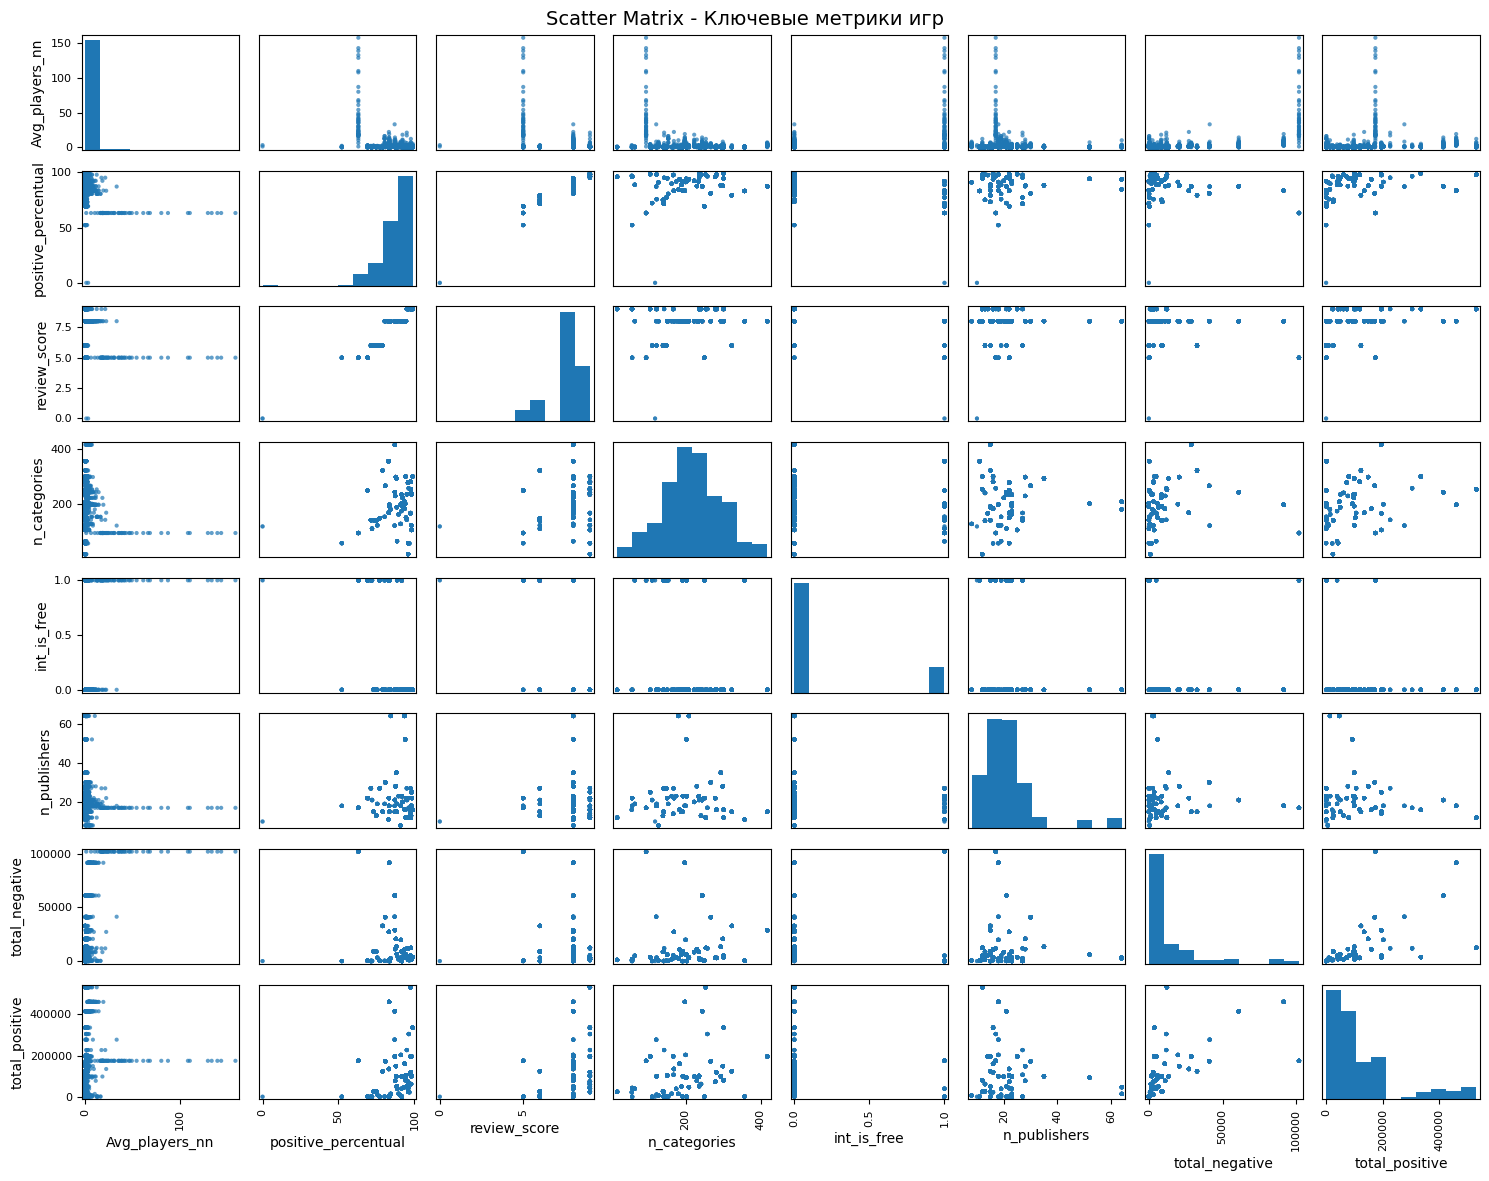

In [27]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

df_copy['Avg_players_nn'] = df_copy['Avg_players'] // 10000
# Фокус на ключевых метриках
key_metrics = ['Avg_players_nn', 'positive_percentual', 'review_score', 'n_categories', 'int_is_free', 'n_publishers', 'total_negative'
              , 'total_positive']

scatter_focus_df = df_copy[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()

У меня есть пару гипотиз по зависимостям.

Первое, что игроки чаще играют в бесплатные игры.

<Figure size 1500x1200 with 0 Axes>

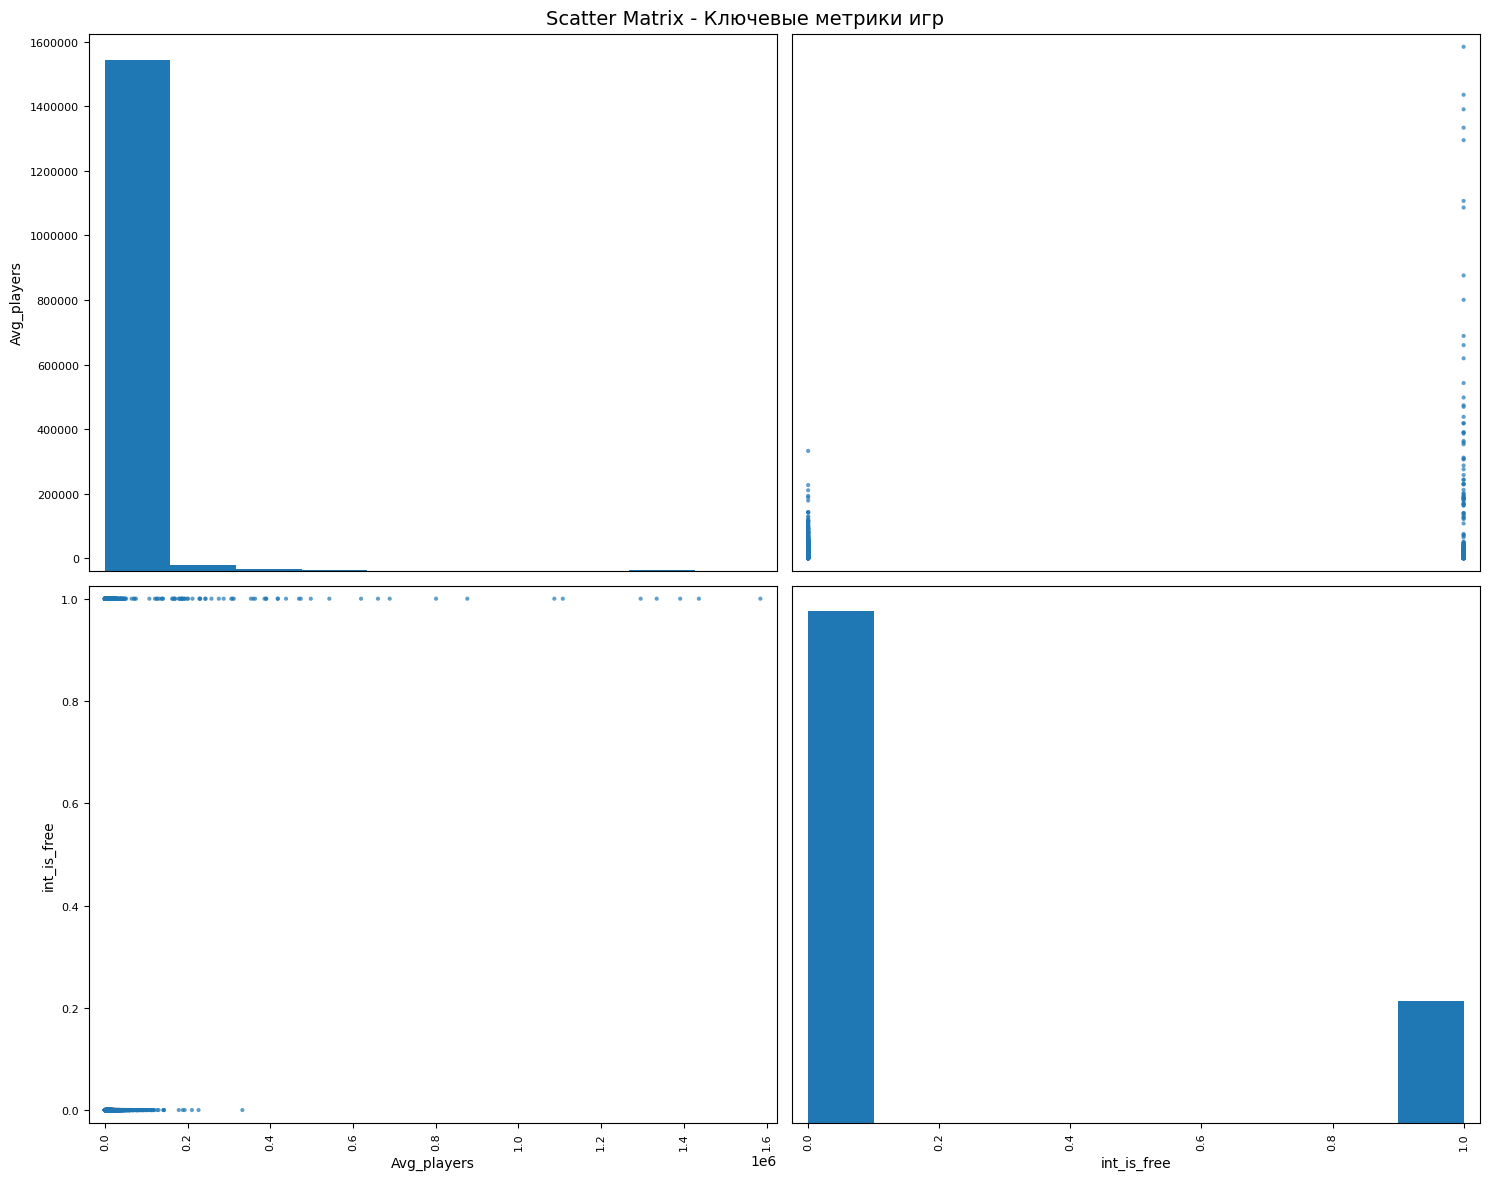

In [28]:
# Фокус на ключевых метриках
key_metrics = ['Avg_players', 'int_is_free']

scatter_focus_df = df_copy[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()

Вторая, что чем больше категорий у игры тем положительнее оц

<Figure size 1500x1200 with 0 Axes>

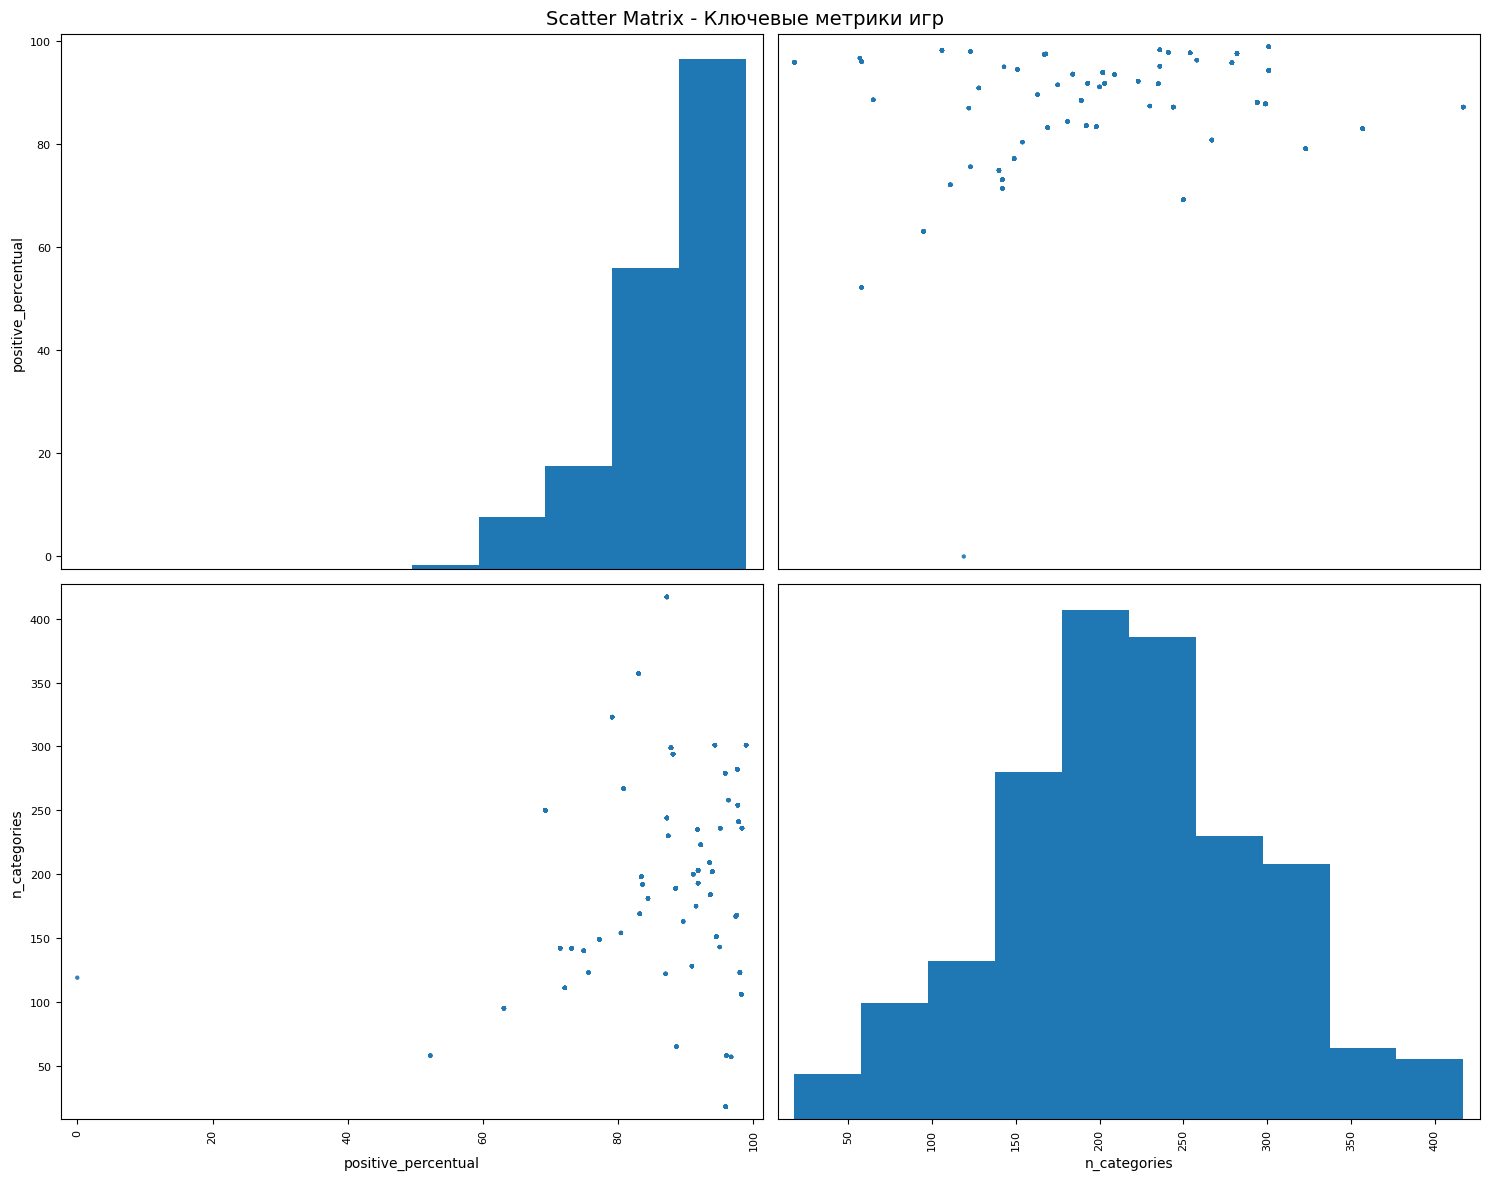

In [29]:
# Фокус на ключевых метриках
key_metrics = ['positive_percentual', 'n_categories']

scatter_focus_df = df_copy[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()